In [1]:
%reload_ext autoreload
%autoreload 2

import os, psutil

from rocket_fft import numpy_like, scipy_like

numpy_like()

os.environ['NUMEXPR_MAX_THREADS'] = '20'
os.environ['NUMBA_DEBUGINFO'] = '0'

from alphadia.extraction import processlogger
processlogger.init_logging()
import logging

logger = logging.getLogger()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neptune.new as neptune
import alphatims.bruker as bruker

from alphabase.spectral_library.base import SpecLibBase
from alphadia.extraction.planning import Plan, Workflow

yaml_file = 'config.yaml'

raw_files = [
        '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_05_29_True_singleCells_diaPASEF_Synchro/20230526_TIMS05_MCT_SA_HeLa_SynchroTest_singleCell_SM03_p11_BC2_SyP4_26_S3-G10_1_2691.d',
    ]

output_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_05_19_SyP5_single_cells'

try:
    neptune_token = os.environ['NEPTUNE_TOKEN']
except KeyError:
    logger.error('NEPTUNE_TOKEN environtment variable not set')

0:00:00.828478  WARNING: WARNING: Temp mmap arrays are written to /var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/temp_mmap__05mi_q4. Cleanup of this folder is OS dependant, and might need to be triggered manually! Current space: 897,033,510,912
0:00:00.840001  WARNING: WARNING: No Bruker libraries are available for this operating system. Mobility and m/z values need to be estimated. While this estimation often returns acceptable results with errors < 0.02 Th, huge errors (e.g. offsets of 6 Th) have already been observed for some samples!
0:00:00.840398  INFO: 


In [5]:
from alphadia.extraction import data

In [2]:
test_lib = SpecLibBase()
test_lib_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/libraries/marvin_scp/MSfragger_library_mod_noLossType_d0_d4_d8_d12_shared_eg_n_fragments_mbr.hdf'
test_lib.load_hdf(test_lib_location, load_mod_seq=True)

0:00:08.099730  PROGRESS:       _   _      _         ___ ___   _   
0:00:08.100154  PROGRESS:      /_\ | |_ __| |_  __ _|   \_ _| /_\  
0:00:08.100400  PROGRESS:     / _ \| | '_ \ ' \/ _` | |) | | / _ \ 
0:00:08.100582  PROGRESS:    /_/ \_\_| .__/_||_\__,_|___/___/_/ \_\
0:00:08.100861  PROGRESS:            |_|                            
0:00:08.101098  PROGRESS: 
0:00:08.101685  INFO: loading default config from /Users/georgwallmann/Documents/git/alphadia/alphadia/extraction/../../misc/config/default.yaml
0:00:08.108058  INFO: Applying config update from dict
0:00:08.108478  PROGRESS: version: 1.0.2
0:00:08.108717  PROGRESS: hostname: Georgs-MBP.fritz.box
0:00:08.109066  PROGRESS: date: 2023-06-15 00:20:11
0:00:11.614717  INFO: renaming precursor_columns columns
0:00:11.615675  INFO: renaming fragment_columns columns
0:00:11.616065  INFO: ========= Library Stats =========
0:00:11.616330  INFO: Number of precursors: 220,333
0:00:11.645889  INFO: 	thereof targets:176,268
0:00:11.646333

7832


  0%|          | 0/13952 [00:00<?, ?it/s]/Users/georgwallmann/Documents/git/alphatims/alphatims/utils.py:583: NumbaTypeSafetyWarning: unsafe cast from float64 to float32. Precision may be lost.
  numba_func(i, *args)
/Users/georgwallmann/Documents/git/alphatims/alphatims/utils.py:583: NumbaTypeSafetyWarning: unsafe cast from int64 to float32. Precision may be lost.
  numba_func(i, *args)
100%|██████████| 13952/13952 [00:03<00:00, 4129.50it/s]
0:41:20.973291  INFO: Scored 13952 candidates
0:41:20.981401  INFO: 0.23% of targets failed, 0.46% of decoys failed
0:41:21.280704  INFO: number of dfs in features: 1, total number of features: 13904


(13904, 25)
(13904,)


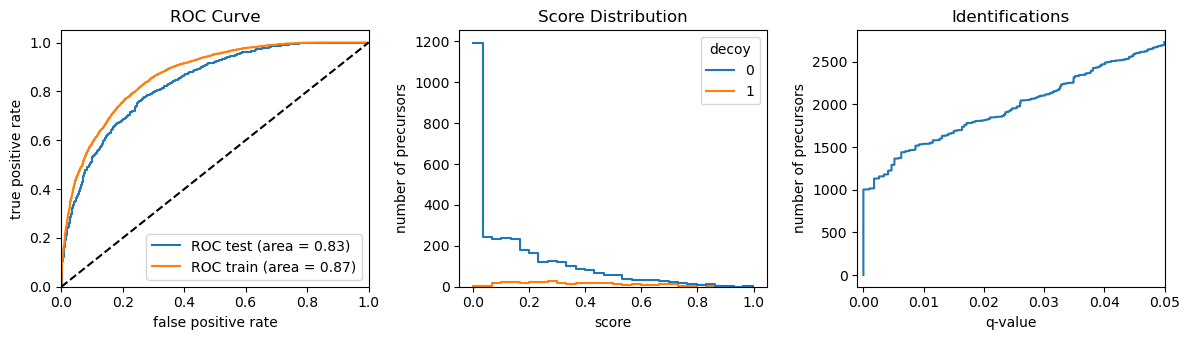

0:41:24.985911  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:41:24.987836  PROGRESS: Accumulated precursors: 3,910, 0.01 FDR: 1,537, 0.001 FDR: 1,015
0:41:24.989735  INFO: calibration group: precursor, fitting mz estimator 


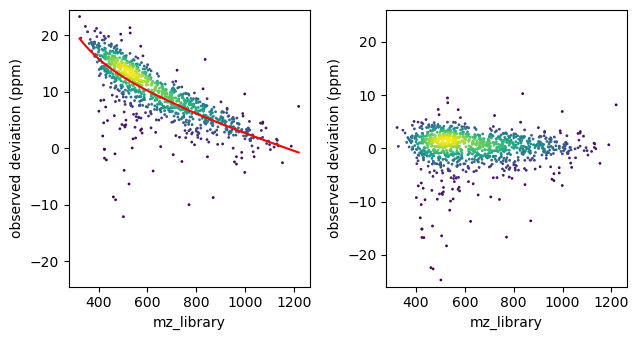

0:41:25.189569  INFO: calibration group: precursor, fitting rt estimator 


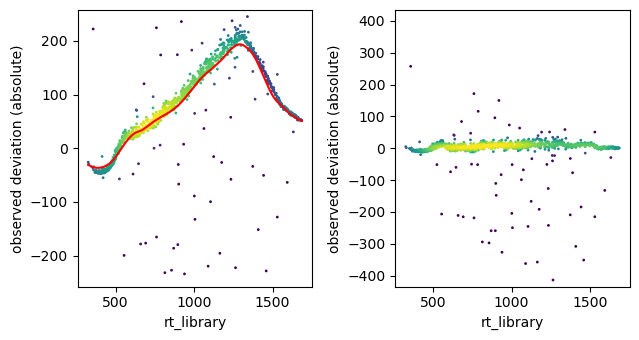

0:41:25.376972  INFO: calibration group: precursor, fitting mobility estimator 


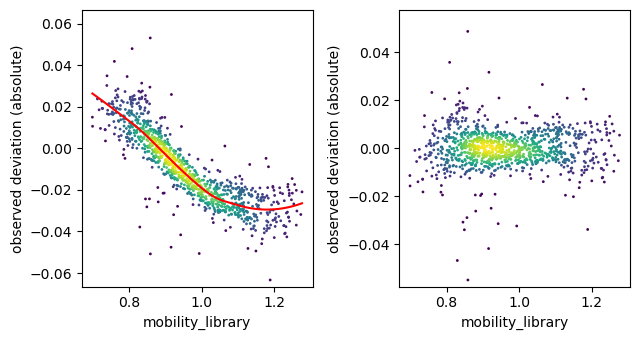

0:41:25.586748  INFO: calibration group: fragment, fitting mz estimator 


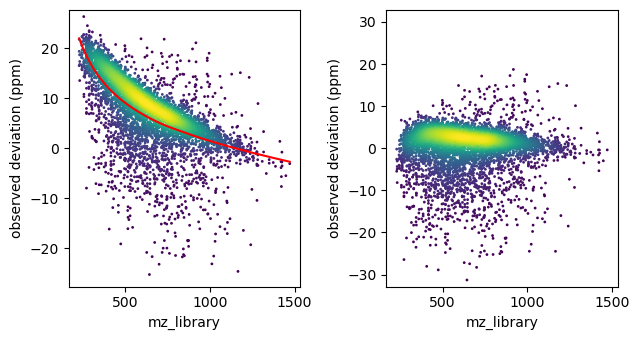

0:41:26.382345  INFO: calibration group: precursor, predicting mz
0:41:26.401374  INFO: calibration group: precursor, predicting rt
0:41:26.448221  INFO: calibration group: precursor, predicting mobility
0:41:26.466781  INFO: calibration group: fragment, predicting mz
0:41:26.999524  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 4000 ===
0:41:27.007465  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 74.7663510079216, Mobility error: 0.04
0:41:27.010466  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:41:27.011068  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:41:27.011495  INFO: FWHM in RT is 4.26 seconds, sigma is 1.57
0:41:27.012016  INFO: FWHM in mobility is 0.009 1/K_0, sigma is 6.21


7826


100%|██████████| 13117/13117 [00:02<00:00, 5028.11it/s]
0:43:18.027978  INFO: Scored 13117 candidates
0:43:18.035747  INFO: 0.51% of targets failed, 0.92% of decoys failed
0:43:18.256805  INFO: number of dfs in features: 1, total number of features: 13024


(13024, 25)
(13024,)


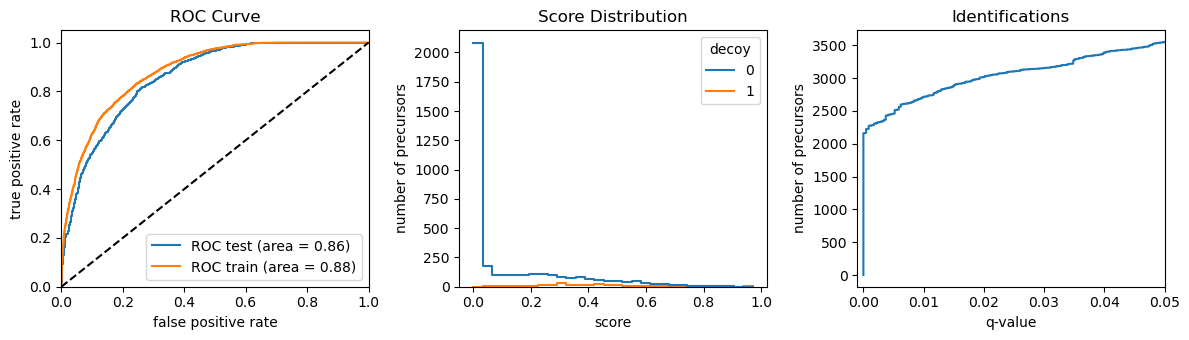

0:43:20.025992  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:43:20.026481  PROGRESS: Accumulated precursors: 3,903, 0.01 FDR: 2,706, 0.001 FDR: 2,274
0:43:20.028573  INFO: calibration group: precursor, fitting mz estimator 


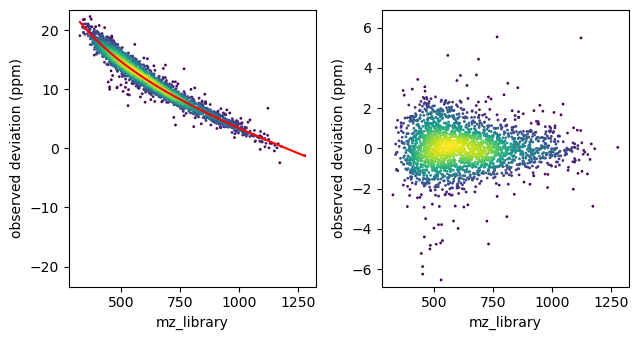

0:43:20.343560  INFO: calibration group: precursor, fitting rt estimator 


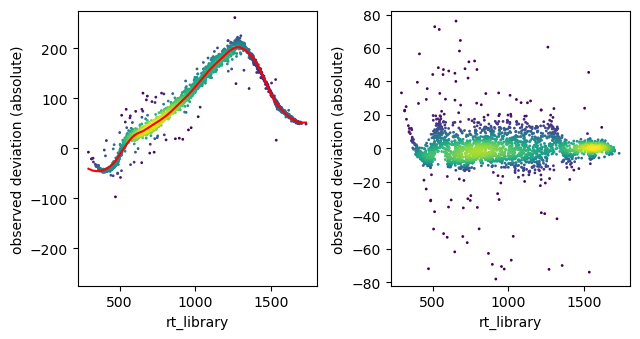

0:43:20.676794  INFO: calibration group: precursor, fitting mobility estimator 


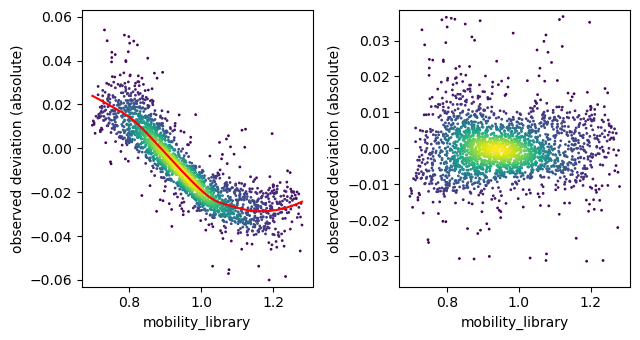

0:43:21.042284  INFO: calibration group: fragment, fitting mz estimator 


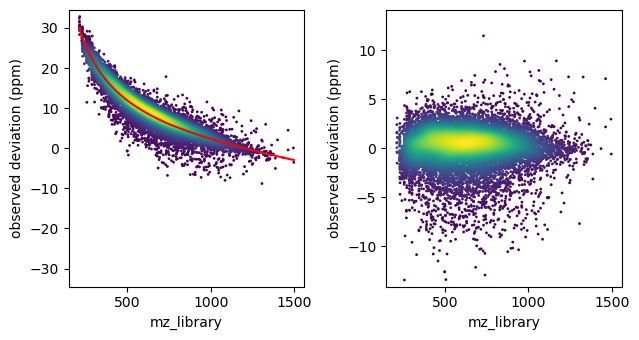

0:43:23.952536  INFO: calibration group: precursor, predicting mz
0:43:23.971890  INFO: calibration group: precursor, predicting rt
0:43:24.024303  INFO: calibration group: precursor, predicting mobility
0:43:24.046412  INFO: calibration group: fragment, predicting mz
0:43:24.584293  PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 4000 ===
0:43:24.591820  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:43:24.594657  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:43:24.595073  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:43:24.595600  INFO: FWHM in RT is 3.71 seconds, sigma is 1.37
0:43:24.596010  INFO: FWHM in mobility is 0.007 1/K_0, sigma is 4.72


7824


100%|██████████| 12510/12510 [00:02<00:00, 4831.03it/s]
0:44:34.255617  INFO: Scored 12510 candidates
0:44:34.263893  INFO: 0.72% of targets failed, 1.33% of decoys failed
0:44:34.462709  INFO: number of dfs in features: 1, total number of features: 12382


(12382, 25)
(12382,)


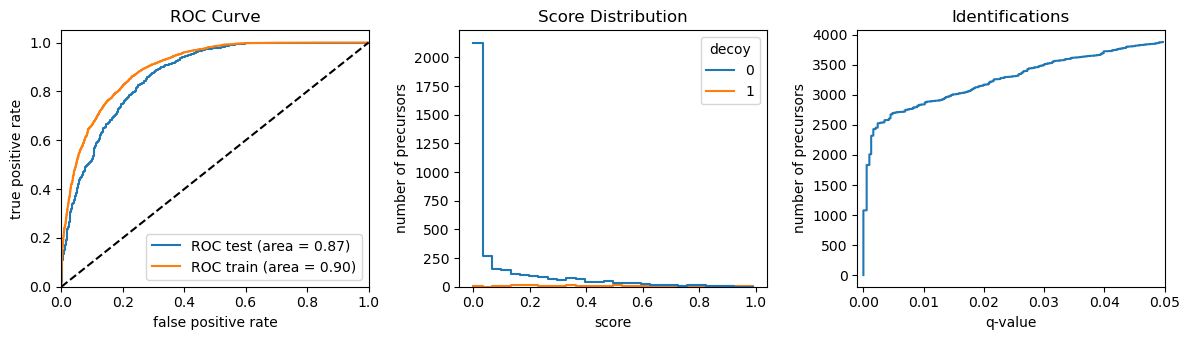

0:44:36.570826  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:44:36.571574  PROGRESS: Accumulated precursors: 3,901, 0.01 FDR: 2,843, 0.001 FDR: 2,012
0:44:36.575149  INFO: calibration group: precursor, fitting mz estimator 


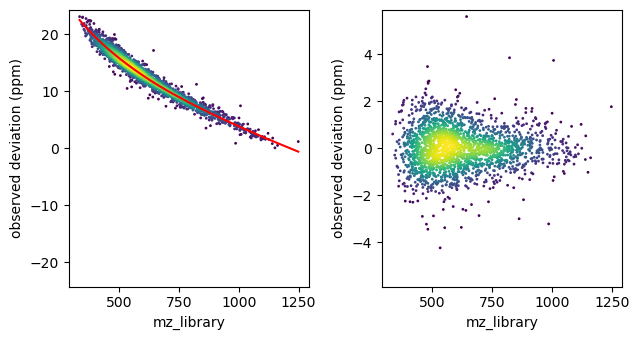

0:44:37.000618  INFO: calibration group: precursor, fitting rt estimator 


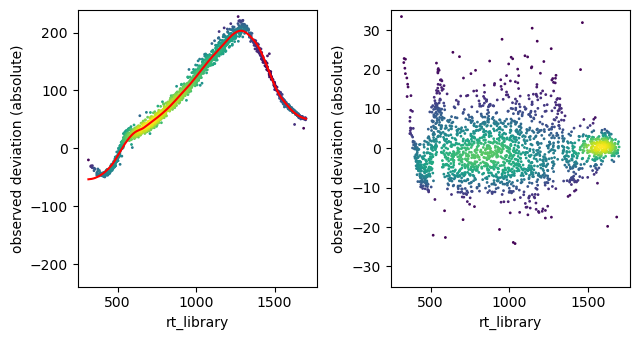

0:44:37.377564  INFO: calibration group: precursor, fitting mobility estimator 


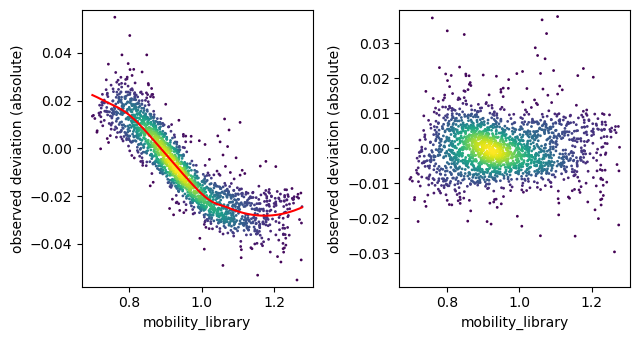

0:44:37.781068  INFO: calibration group: fragment, fitting mz estimator 


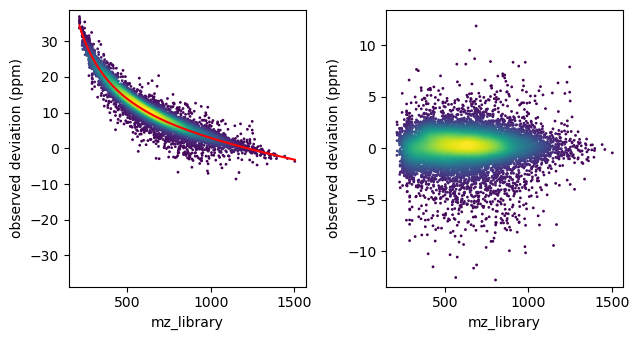

0:44:40.156800  INFO: calibration group: precursor, predicting mz
0:44:40.176719  INFO: calibration group: precursor, predicting rt
0:44:40.233341  INFO: calibration group: precursor, predicting mobility
0:44:40.257067  INFO: calibration group: fragment, predicting mz
0:44:40.882404  INFO: calibration group: precursor, predicting mz
0:44:40.902119  INFO: calibration group: precursor, predicting rt
0:44:40.960399  INFO: calibration group: precursor, predicting mobility
0:44:40.984183  INFO: calibration group: fragment, predicting mz
0:44:41.570444  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:44:41.599571  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:44:41.600313  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:44:41.600796  INFO: FWHM in RT is 3.83 seconds, sigma is 1.42
0:44:41.601309  INFO: FWHM in mobility is 0.008 1/K_0, sigma is 4.98


88132


100%|██████████| 297991/297991 [00:55<00:00, 5364.15it/s]
1:20:20.675357  INFO: Scored 297991 candidates
1:20:20.890932  INFO: 1.01% of targets failed, 1.70% of decoys failed


(293961, 25)
(293961,)


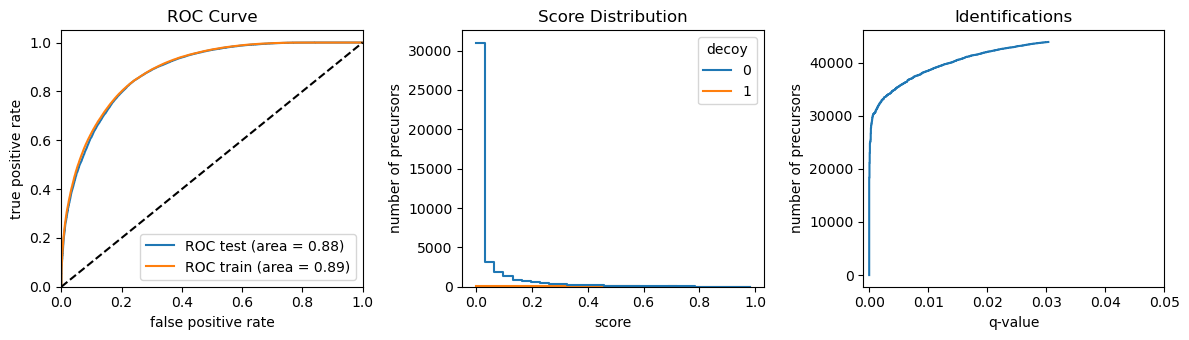

1:20:46.464114  PROGRESS: === extraction finished, 0.05 FDR: 42,600, 0.01 FDR: 38,103, 0.001 FDR: 30,538 ===
1:20:47.534895  INFO: calibration group: precursor, predicting mz
1:20:47.556256  INFO: calibration group: precursor, predicting rt
1:20:47.618007  INFO: calibration group: precursor, predicting mobility
1:20:47.643463  INFO: calibration group: fragment, predicting mz
100%|██████████| 38103/38103 [00:02<00:00, 18876.55it/s]
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_31503/742590515.py:111: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features_df = df[set(df.columns) - set(['top3_reference_template_frame_cosine','top3_reference_template_scan_cosine', 'top3_y_ion_correlation','top3_b_ion_correlation'])].copy()
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_31503/742590515.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

(73649, 60)
(73649,)


/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_31503/742590515.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['proba'] = pipeline.predict_proba(X)[:,1]


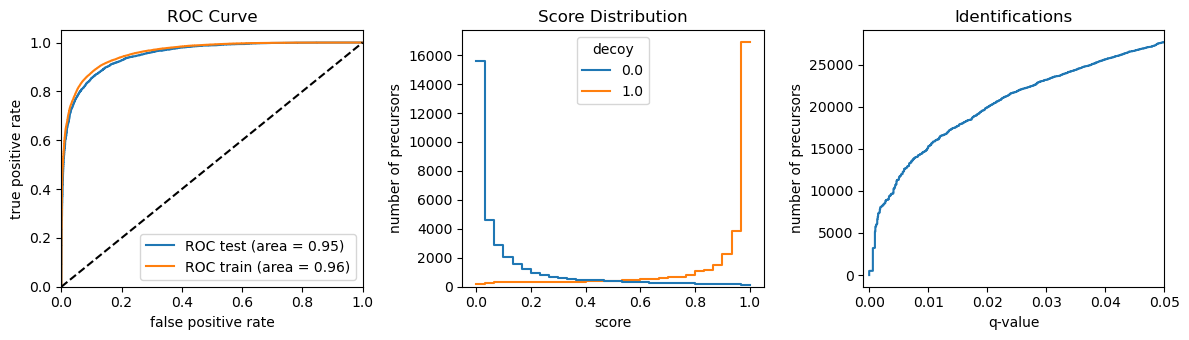

15283
3600
(73648, 60)
(73648,)


/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_31503/742590515.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['decoy'] = np.zeros(len(channel_df))
/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_31503/742590515.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['proba'] = pipeline.predict_proba(X)[:,1]


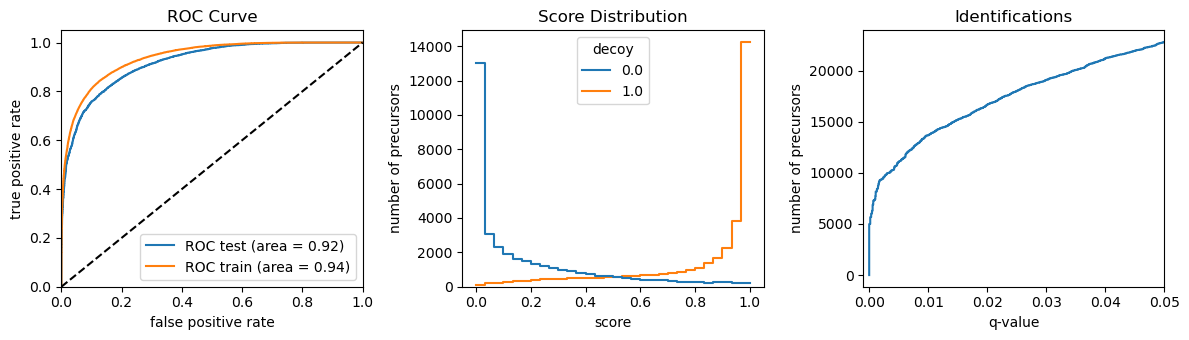

13672
3287


In [3]:
import time
plan = Plan(raw_files, config_update = 
            {'extraction':
                {
                    'target_mobility_tolerance': 0.04,
                    'target_rt_tolerance': 30,
                    'target_ms1_tolerance': 10,
                    'min_epochs': 3,
                }
            }
        )

plan.from_spec_lib_base(test_lib)
for dia_data, precursors_flat, fragments_flat in plan.get_run_data():

    start_time = time.time()
    
    reference_flat = precursors_flat[precursors_flat['channel'] == 0].copy()

    workflow = Workflow(
        plan.config, 
        dia_data, 
        reference_flat, 
        fragments_flat
    )

    workflow.calibration()
    d0_df = workflow.extraction()

    raw_name = precursors_flat['raw_name'].iloc[0]
    d0_df.to_csv(os.path.join(output_location, f'{raw_name}_d0.tsv'), sep = '\t', index = False)

    d0_df = d0_df[d0_df['qval'] < 0.01]
    d0_df = d0_df[d0_df['decoy'] == 0]
    workflow.calibration_manager.predict(precursors_flat, 'precursor')
    workflow.calibration_manager.predict(fragments_flat, 'fragment')

    from alphadia.extraction import utils, plexscoring, quadrupole
    import alphatims.utils
    from tqdm import tqdm
    import numba as nb

    multiplex = plexscoring.Multiplexer(precursors_flat, fragments_flat, d0_df.copy())
    candidates_df = multiplex()
    candidates_df['rank'] = np.zeros(len(candidates_df), dtype = np.int64)
    candidates_df = utils.calculate_score_groups(candidates_df, group_channels=True)

    score_group_container = plexscoring.ScoreGroupContainer()
    score_group_container.build_from_df(
        candidates_df['elution_group_idx'].values.astype(np.uint32),
        candidates_df['score_group_idx'].values.astype(np.uint32),
        candidates_df['precursor_idx'].values.astype(np.uint32),
        candidates_df['channel'].values.astype(np.uint8),
        candidates_df['flat_frag_start_idx'].values.astype(np.uint32),
        candidates_df['flat_frag_stop_idx'].values.astype(np.uint32),

        candidates_df['scan_start'].values,
        candidates_df['scan_stop'].values,
        candidates_df['scan_center'].values,
        candidates_df['frame_start'].values,
        candidates_df['frame_stop'].values,
        candidates_df['frame_center'].values,

        candidates_df['charge'].values,
        candidates_df['mz_calibrated'].values.astype(np.float32),
        candidates_df[utils.get_isotope_column_names(candidates_df.columns)].values.astype(np.float32),
    )

    q = quadrupole.SimpleQuadrupole(dia_data.cycle)
    fragment_container = plexscoring.assemble_fragments(fragments_flat)

    config = plexscoring.CandidateConfig()
    config.max_cardinality = 1
    config.score_grouped = True

    alphatims.utils.set_threads(10)

    plexscoring._executor(
        range(len(score_group_container)), 
        score_group_container,
        fragment_container,
        dia_data,
        config.jitclass(),
        q.jit,
        False
    )

    dict_list = []
    precursor_idx_list = []
    channel_list = []


    for elem in tqdm(score_group_container):
        for i, candidate in enumerate(elem.candidates):
            if (len(candidate.features) > 0) and (candidate.channel != 0):
                
                precursor_idx_list.append(candidate.precursor_idx)
                dict_list.append(candidate.features)
                channel_list.append(candidate.channel)

    df = pd.DataFrame(dict_list)
    df['precursor_idx'] = precursor_idx_list
    df['channel'] = channel_list

    df = df.merge(
        precursors_flat[['precursor_idx', 'decoy', 'proteins',]],
        on='precursor_idx',
        how='left'
    )

    features_df = df[set(df.columns) - set(['top3_reference_template_frame_cosine','top3_reference_template_scan_cosine', 'top3_y_ion_correlation','top3_b_ion_correlation'])].copy()
    all_feature_columns = list(set(features_df.columns) - set(['channel', 'precursor_idx','decoy','proteins']))

    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    from sklearn.neural_network import MLPClassifier

    from alphadia.library import fdr_to_q_values

    output_dfs = []

    for channel in [4,8]:
        channel_df = features_df[features_df['channel'].isin([channel, 12])]
        channel_df['decoy'] = np.zeros(len(channel_df))
        channel_df.loc[channel_df['channel'] == 12, 'decoy'] = 1

        channel_df = channel_df.dropna()

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('GBC',MLPClassifier(hidden_layer_sizes=(50, 25, 5), max_iter=1000, alpha=0.1, learning_rate='adaptive', learning_rate_init=0.001, early_stopping=True, tol=1e-6))
        ])

        X = channel_df[all_feature_columns].values
        y = channel_df['decoy'].values

        
        

        print(X.shape)
        print(y.shape)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        pipeline.fit(X_train, y_train)
        

        y_test_proba = pipeline.predict_proba(X_test)[:,1]
        y_test_pred = np.round(y_test_proba)

        y_train_proba = pipeline.predict_proba(X_train)[:,1]
        y_train_pred = np.round(y_train_proba)

        channel_df['proba'] = pipeline.predict_proba(X)[:,1]
        # subset to the best candidate for every precursor
        channel_df = channel_df.sort_values(by=['proba'], ascending=True)
        features_best_df = channel_df


        # ROC curve
        fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
        roc_auc_test = auc(fpr_test, tpr_test)

        fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
        roc_auc_train = auc(fpr_train, tpr_train)

        
        
        # plotting

        fig, axs = plt.subplots(ncols=3, figsize=(12,3.5))

        axs[0].plot(fpr_test, tpr_test,label="ROC test (area = %0.2f)" % roc_auc_test)
        axs[0].plot(fpr_train, tpr_train,label="ROC train (area = %0.2f)" % roc_auc_train)

        axs[0].plot([0, 1], [0, 1], color="k", linestyle="--")
        axs[0].set_xlim([0.0, 1.0])
        axs[0].set_ylim([0.0, 1.05])
        axs[0].set_xlabel("false positive rate")
        axs[0].set_ylabel("true positive rate")
        axs[0].set_title("ROC Curve")
        axs[0].legend(loc="lower right")
        
        sns.histplot(data=features_best_df, x='proba', hue='decoy', bins=30, element="step", fill=False, ax=axs[1])
        axs[1].set_xlabel('score')
        axs[1].set_ylabel('number of precursors')
        axs[1].set_title("Score Distribution")

        features_best_df = features_best_df.sort_values(['proba'], ascending=True)
        target_values = 1-features_best_df['decoy'].values
        decoy_cumsum = np.cumsum(features_best_df['decoy'].values)
        target_cumsum = np.cumsum(target_values)
        fdr_values = decoy_cumsum/target_cumsum
        features_best_df['qval'] = fdr_to_q_values(fdr_values)
        q_val = features_best_df[features_best_df['qval'] <0.05 ]['qval'].values

        ids = np.arange(0, len(q_val), 1)
        axs[2].plot(q_val, ids)
        axs[2].set_xlim(-0.001, 0.05)
        axs[2].set_xlabel('q-value')
        axs[2].set_ylabel('number of precursors')
        axs[2].set_title("Identifications")
        
        fig.tight_layout()
        plt.show()

        print(len(features_best_df[features_best_df['qval'] <=0.01 ]['qval']))
        print(features_best_df[features_best_df['qval'] <=0.01 ]['proteins'].nunique())


        output_dfs.append(features_best_df[features_best_df['qval'] <=0.01])

    del dia_data

    stop_time = time.time()
    duration = stop_time - start_time

    duration_df = pd.DataFrame({'raw_name': [raw_name], 'duration': [duration]})
    duration_df.to_csv(os.path.join(output_location, f'{raw_name}_duration.tsv'), sep = '\t', index = False)

    output_dfs = pd.concat(output_dfs)
    output_dfs.to_csv(os.path.join(output_location, f'{raw_name}_d4_d8.tsv'), sep = '\t', index = False)
    